<a href="https://colab.research.google.com/github/dorsaalh/Spikey_Neurons_Simulation/blob/main/CN_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install brian2

In [ ]:
pip install brian2tools

In [ ]:
%matplotlib inline
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np
from brian2tools import *
from brian2.units import *

In [ ]:
tau = 200
V_th = -50
V_r = -70
I_first_exc = 150
I_second_exc = 100
I_inh = 0
R = 2
V_init = -70
p_first_exc = 0.1
p_second_exc = 0.08
p_e = 0.05
p_i = 0.2
w_first_e = 0.7
w_second_e = 0.8
w_e = 2
w_i = -8
N_first_exc = 800
N_second_exc = 800
N_inh = 200

In [ ]:
start_scope()
G = NeuronGroup(N_first_exc + N_second_exc + N_inh , '''dv/dt = (((V_r - v)+(R*I))/tau ) /(ms) : 1
                                  I : 1''',
                threshold = 'v > V_th',
                reset='v = V_r'
                )

first_exc_G =  G[ :N_first_exc]    
second_exc_G =  G[N_first_exc  : N_first_exc + N_second_exc] 
inh_G =  G[ N_first_exc + N_second_exc : ]                                                


first_exc_G.v = V_init
first_exc_G.I = I_first_exc


second_exc_G.v = V_init
second_exc_G.I = I_second_exc


inh_G.v = V_init
inh_G.I = I_inh

 
first_exc_synapse = Synapses(first_exc_G , first_exc_G, 'w:1' , on_pre = 'v += w')  
second_exc_synapse = Synapses(second_exc_G , second_exc_G , 'w:1' , on_pre = 'v += w')  
inh_synapse = Synapses(inh_G , inh_G , 'w:1' , on_pre = 'v += w')


first_exc_synapse.connect(p = p_first_exc)
first_exc_synapse.w = w_first_e
second_exc_synapse.connect(p = p_second_exc)
second_exc_synapse.w = w_second_e
inh_synapse.connect(p = p_i)
inh_synapse.w = w_i


spike_mon_first_exc = SpikeMonitor(first_exc_G)
spike_mon_second_exc = SpikeMonitor(second_exc_G)
spike_mon_inh = SpikeMonitor(inh_G)
spike_mon_G = SpikeMonitor(G)


state_mon_first_exc_I = StateMonitor(first_exc_G , 'I' , record=True)
state_mon_first_exc_V = StateMonitor(first_exc_G , 'v' , record=True)
state_mon_second_exc_V = StateMonitor(second_exc_G , 'v' , record=True)
state_mon_second_exc_I = StateMonitor(second_exc_G , 'I' , record=True)
state_mon_G_V = StateMonitor(G , 'v' , record=True)


run(100*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


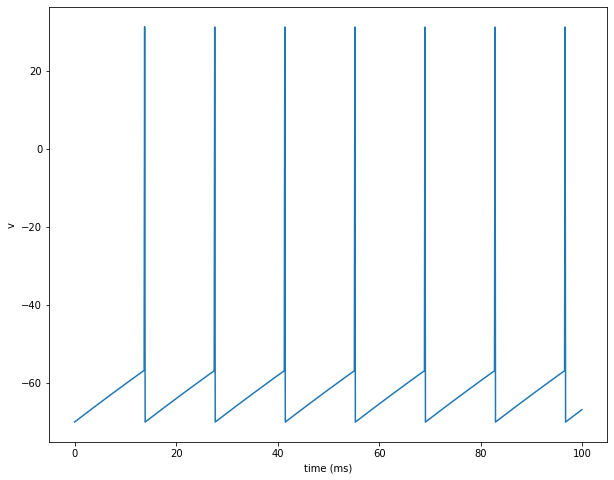

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_second_exc_V[7])

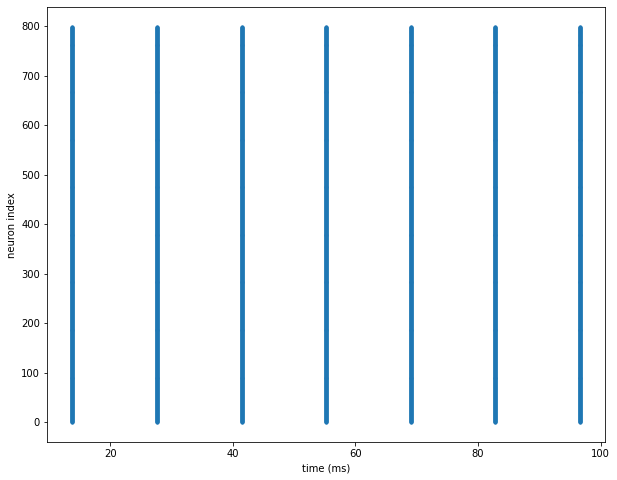

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_second_exc)

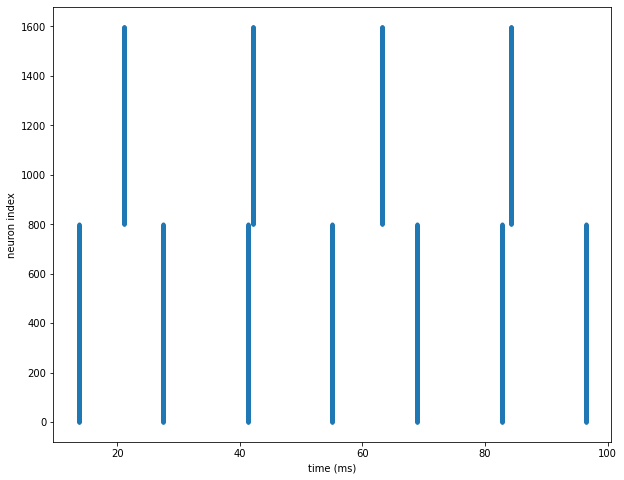

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_G)

In [ ]:
print(f"G spike = {spike_mon_G.num_spikes} ")
print(f"first exc spike = {spike_mon_first_exc.num_spikes} ")
print(f"second exc spike = {spike_mon_second_exc.num_spikes} ")
print(f"inh spike = {spike_mon_inh.num_spikes} ")

G spike = 8800 
first exc spike = 5600 
second exc spike = 3200 
inh spike = 0 


In [ ]:
start_scope()
G = NeuronGroup(N_first_exc + N_second_exc + N_inh , '''dv/dt = (((V_r - v)+(R*I))/tau ) /(ms) : 1
                                  I : 1''',
                threshold = 'v > V_th',
                reset='v = V_r'
                )

first_exc_G =  G[ :N_first_exc]    
second_exc_G =  G[N_first_exc  : N_first_exc + N_second_exc] 
inh_G =  G[ N_first_exc + N_second_exc : ]                                                


first_exc_G.v = V_init
first_exc_G.I = I_first_exc


second_exc_G.v = V_init
second_exc_G.I = I_second_exc


inh_G.v = V_init
inh_G.I = I_inh

 
first_exc_synapse = Synapses(first_exc_G , first_exc_G, 'w:1' , on_pre = 'v += w')  
second_exc_synapse = Synapses(second_exc_G , second_exc_G , 'w:1' , on_pre = 'v += w')  
inh_synapse = Synapses(inh_G , inh_G , 'w:1' , on_pre = 'v += w')


first_exc_synapse.connect(p = p_first_exc)
first_exc_synapse.w = w_first_e


second_exc_synapse.connect(p = p_second_exc)
second_exc_synapse.w = w_second_e


inh_synapse.connect(p = p_i)
inh_synapse.w = w_i


excs_synapse =  Synapses(first_exc_G , second_exc_G , 'w:1' , on_pre = 'v += w')  
excs_synapse.connect(p = p_e)
excs_synapse.w = w_e


spike_mon_first_exc = SpikeMonitor( first_exc_G )
spike_mon_second_exc = SpikeMonitor( second_exc_G )
spike_mon_inh = SpikeMonitor(inh_G)
spike_mon_G = SpikeMonitor(G)


state_mon_first_exc_I = StateMonitor(first_exc_G , 'I' , record=True)
state_mon_first_exc_V = StateMonitor(first_exc_G , 'v' , record=True)
state_mon_second_exc_V = StateMonitor(second_exc_G , 'v' , record=True)
state_mon_second_exc_I = StateMonitor(second_exc_G , 'I' , record=True)
state_mon_G_V = StateMonitor(G , 'v' , record=True)


run(100*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'exact' (took 0.03s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


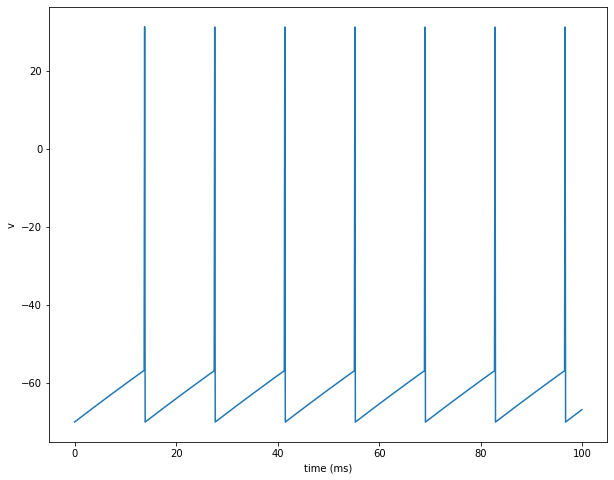

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_second_exc_V[7])

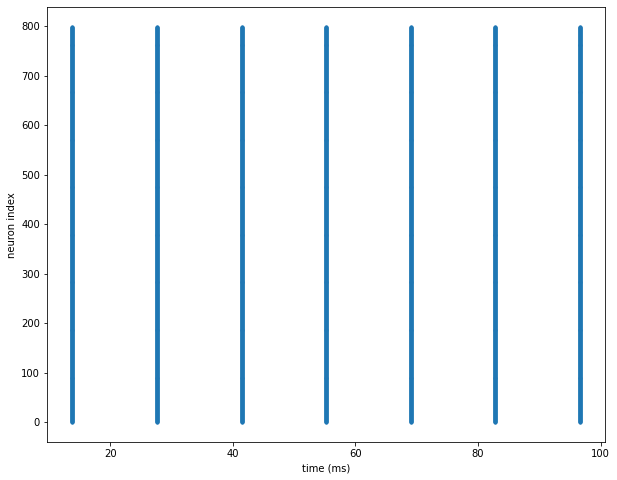

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_second_exc)

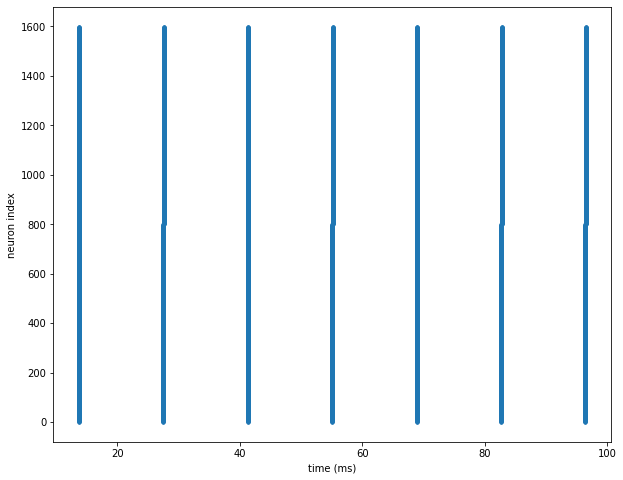

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_G)

In [ ]:
print(f"G spike = {spike_mon_G.num_spikes} ")
print(f"first exc spike = {spike_mon_first_exc.num_spikes} ")
print(f"second exc spike = {spike_mon_second_exc.num_spikes} ")
print(f"inh spike = {spike_mon_inh.num_spikes} ")

G spike = 11200 
first exc spike = 5600 
second exc spike = 5600 
inh spike = 0 
